In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv('/content/Different_stores_data.csv')

In [4]:
import calendar
from datetime import datetime, timedelta

# List of public holidays in 2016 (for the US as an example)
public_holidays = [
    "2016-01-01",  # New Year's Day
    "2016-01-18",  # Martin Luther King Jr. Day
    "2016-02-15",  # Presidents' Day
    "2016-05-30",  # Memorial Day
    "2016-07-04",  # Independence Day
    "2016-09-05",  # Labor Day
    "2016-10-10",  # Columbus Day
    "2016-11-11",  # Veterans Day
    "2016-11-24",  # Thanksgiving Day
    "2016-12-25",  # Christmas Day
]

# Convert public holidays to datetime objects
public_holidays = [datetime.strptime(date, "%Y-%m-%d").date() for date in public_holidays]

# Generate all dates in the year 2016
start_date = datetime(2016, 1, 1)
end_date = datetime(2016, 12, 31)
delta = timedelta(days=1)

dates_info = []

while start_date <= end_date:
    is_weekend = start_date.weekday() >= 5  # Saturday and Sunday
    is_public_holiday = start_date.date() in public_holidays
    is_holiday = is_weekend or is_public_holiday

    dates_info.append({
        "invoice_date": start_date.strftime("%Y-%m-%d"),
        "Is_Holiday": "Yes" if is_holiday else "No",
        "Reason": "Weekend" if is_weekend else ("Public Holiday" if is_public_holiday else "None")
    })

    start_date += delta

# Convert to a DataFrame for better visualization
import pandas as pd
dates_df = pd.DataFrame(dates_info)

#import ace_tools as tools; tools.display_dataframe_to_user(name="2016 Holiday Information", dataframe=dates_df)

In [5]:
dates_df

,invoice_date,Is_Holiday,Reason
0,2016-01-01,Yes,Public Holiday
1,2016-01-02,Yes,Weekend
2,2016-01-03,Yes,Weekend
3,2016-01-04,No,None
4,2016-01-05,No,None
...,...,...,...
361,2016-12-27,No,None
362,2016-12-28,No,None
363,2016-12-29,No,None
364,2016-12-30,No,None


In [6]:
dates_df.head()

,invoice_date,Is_Holiday,Reason
0,2016-01-01,Yes,Public Holiday
1,2016-01-02,Yes,Weekend
2,2016-01-03,Yes,Weekend
3,2016-01-04,No,None
4,2016-01-05,No,None


In [7]:
sales['invoice_date'] = pd.to_datetime(sales['invoice_date'], format='mixed', errors='coerce')
dates_df['invoice_date'] = pd.to_datetime(dates_df['invoice_date'])


sales = sales.merge(dates_df, on='invoice_date', how='left')

In [8]:
sales.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Unnamed: 13,Unnamed: 14,Is_Holiday,Reason
0,I824010,2016-11-15,C101310,Male,63,Food & Beverage,2,10.46,7.322,Debit Card,South,Alabama,Metrocity,NaN,NaN,No,None
1,I232867,2016-11-15,C103240,Female,36,Souvenir,3,35.19,24.633,Credit Card,South,Georgia,Mall of Istanbul,NaN,NaN,No,None
2,I702964,2016-11-15,C105114,Male,56,Technology,4,4200.00,3780.000,Cash,South,Georgia,Istinye Park,NaN,NaN,No,None
3,I170504,2016-11-15,C102490,Female,28,Books,1,15.15,10.605,Cash,West,Arizona,Zorlu Center,NaN,NaN,No,None
4,I219422,2016-11-15,C1011229,Female,45,Souvenir,5,58.65,439.875,Credit Card,South,Alabama,Kanyon,NaN,NaN,No,None


In [9]:
sales.drop(['Unnamed: 14','Unnamed: 13'], axis=1, inplace=True)

In [10]:
sales.shape

(99457, 15)

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   invoice_no              99457 non-null  object        
 1   invoice_date            99457 non-null  datetime64[ns]
 2   customer_id             99457 non-null  object        
 3   gender                  99457 non-null  object        
 4   age                     99457 non-null  int64         
 5   category                99457 non-null  object        
 6   quantity                99457 non-null  int64         
 7   selling_price_per_unit  99457 non-null  float64       
 8   cost_price_per_unit     99457 non-null  float64       
 9   payment_method          99457 non-null  object        
 10  region                  99457 non-null  object        
 11  state                   99457 non-null  object        
 12  shopping_mall           99457 non-null  object

In [12]:
sales.columns

Index(['invoice_no', 'invoice_date', 'customer_id', 'gender', 'age',
       'category', 'quantity', 'selling_price_per_unit', 'cost_price_per_unit',
       'payment_method', 'region', 'state', 'shopping_mall', 'Is_Holiday',
       'Reason'],
      dtype='object')

In [13]:
sales.dtypes

,0
invoice_no,object
invoice_date,datetime64[ns]
customer_id,object
gender,object
age,int64
category,object
quantity,int64
selling_price_per_unit,float64
cost_price_per_unit,float64
payment_method,object


In [14]:
sales.isnull().sum()

,0
invoice_no,0
invoice_date,0
customer_id,0
gender,0
age,0
category,0
quantity,0
selling_price_per_unit,0
cost_price_per_unit,0
payment_method,0


In [15]:
duplicates = sales.duplicated().sum()
print(duplicates)

0


In [16]:
sales['invoice_month'] = sales['invoice_date'].dt.month
sales['invoice_day'] = sales['invoice_date'].dt.day

In [17]:
sales.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Is_Holiday,Reason,invoice_month,invoice_day
0,I824010,2016-11-15,C101310,Male,63,Food & Beverage,2,10.46,7.322,Debit Card,South,Alabama,Metrocity,No,None,11,15
1,I232867,2016-11-15,C103240,Female,36,Souvenir,3,35.19,24.633,Credit Card,South,Georgia,Mall of Istanbul,No,None,11,15
2,I702964,2016-11-15,C105114,Male,56,Technology,4,4200.00,3780.000,Cash,South,Georgia,Istinye Park,No,None,11,15
3,I170504,2016-11-15,C102490,Female,28,Books,1,15.15,10.605,Cash,West,Arizona,Zorlu Center,No,None,11,15
4,I219422,2016-11-15,C1011229,Female,45,Souvenir,5,58.65,439.875,Credit Card,South,Alabama,Kanyon,No,None,11,15


In [18]:
sales['profit_per_unit'] = sales['selling_price_per_unit'] - sales['cost_price_per_unit']
sales['invoice_value'] = sales['quantity'] * sales['selling_price_per_unit']
sales['invoice_profit'] = sales['profit_per_unit'] * sales['quantity']

In [19]:
sales.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Is_Holiday,Reason,invoice_month,invoice_day,profit_per_unit,invoice_value,invoice_profit
0,I824010,2016-11-15,C101310,Male,63,Food & Beverage,2,10.46,7.322,Debit Card,South,Alabama,Metrocity,No,None,11,15,3.138,20.92,6.276
1,I232867,2016-11-15,C103240,Female,36,Souvenir,3,35.19,24.633,Credit Card,South,Georgia,Mall of Istanbul,No,None,11,15,10.557,105.57,31.671
2,I702964,2016-11-15,C105114,Male,56,Technology,4,4200.00,3780.000,Cash,South,Georgia,Istinye Park,No,None,11,15,420.000,16800.00,1680.000
3,I170504,2016-11-15,C102490,Female,28,Books,1,15.15,10.605,Cash,West,Arizona,Zorlu Center,No,None,11,15,4.545,15.15,4.545
4,I219422,2016-11-15,C1011229,Female,45,Souvenir,5,58.65,439.875,Credit Card,South,Alabama,Kanyon,No,None,11,15,-381.225,293.25,-1906.125


In [20]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   invoice_no              99457 non-null  object        
 1   invoice_date            99457 non-null  datetime64[ns]
 2   customer_id             99457 non-null  object        
 3   gender                  99457 non-null  object        
 4   age                     99457 non-null  int64         
 5   category                99457 non-null  object        
 6   quantity                99457 non-null  int64         
 7   selling_price_per_unit  99457 non-null  float64       
 8   cost_price_per_unit     99457 non-null  float64       
 9   payment_method          99457 non-null  object        
 10  region                  99457 non-null  object        
 11  state                   99457 non-null  object        
 12  shopping_mall           99457 non-null  object

In [21]:
sales.columns

Index(['invoice_no', 'invoice_date', 'customer_id', 'gender', 'age',
       'category', 'quantity', 'selling_price_per_unit', 'cost_price_per_unit',
       'payment_method', 'region', 'state', 'shopping_mall', 'Is_Holiday',
       'Reason', 'invoice_month', 'invoice_day', 'profit_per_unit',
       'invoice_value', 'invoice_profit'],
      dtype='object')

In [22]:
sales[['state', 'region']].drop_duplicates().sort_values(by='state')

,state,region
0,Alabama,South
3,Arizona,West
27015,Arizona,East
26986,Arizona,Central
27019,California,East
11,California,West
26990,California,Central
27005,Colorado,East
27109,Colorado,Central
14,Colorado,West


In [23]:
state_to_region = {
    'Alabama': 'South',
    'Arizona': 'West',
    'California': 'West',
    'Colorado': 'West',
    'Delaware': 'East',
    'Florida': 'South',
    'Georgia': 'South',
    'Idaho': 'West',
    'Illinois': 'Central',
    'Indiana': 'Central',
    'Iowa': 'Central',
    'Kentucky': 'South',
    'Massachusetts': 'East',
    'Michigan': 'Central',
    'New York': 'East',
    'North Carolina': 'South',
    'Ohio': 'Central',
    'Oregon': 'West',
    'Pennsylvania': 'East',
    'Tennessee': 'South',
    'Texas': 'South',
    'Virginia': 'South',
    'Washington': 'West'
}

sales['region'] = sales['state'].map(state_to_region).fillna(sales['region'])
sales[['state', 'region']].drop_duplicates().sort_values(by='state')

,state,region
0,Alabama,South
3,Arizona,West
11,California,West
14,Colorado,West
16,Delaware,East
132,Florida,South
1,Georgia,South
73,Idaho,West
7,Illinois,Central
187,Indiana,Central


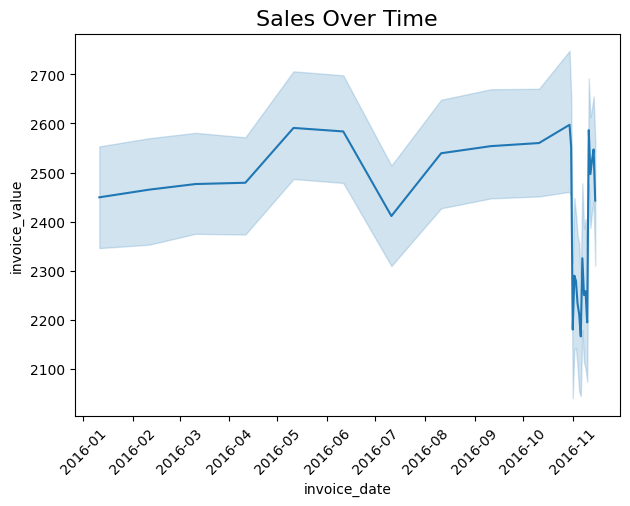

In [24]:
sns.lineplot(x="invoice_date", y="invoice_value", data=sales)
plt.title('Sales Over Time', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

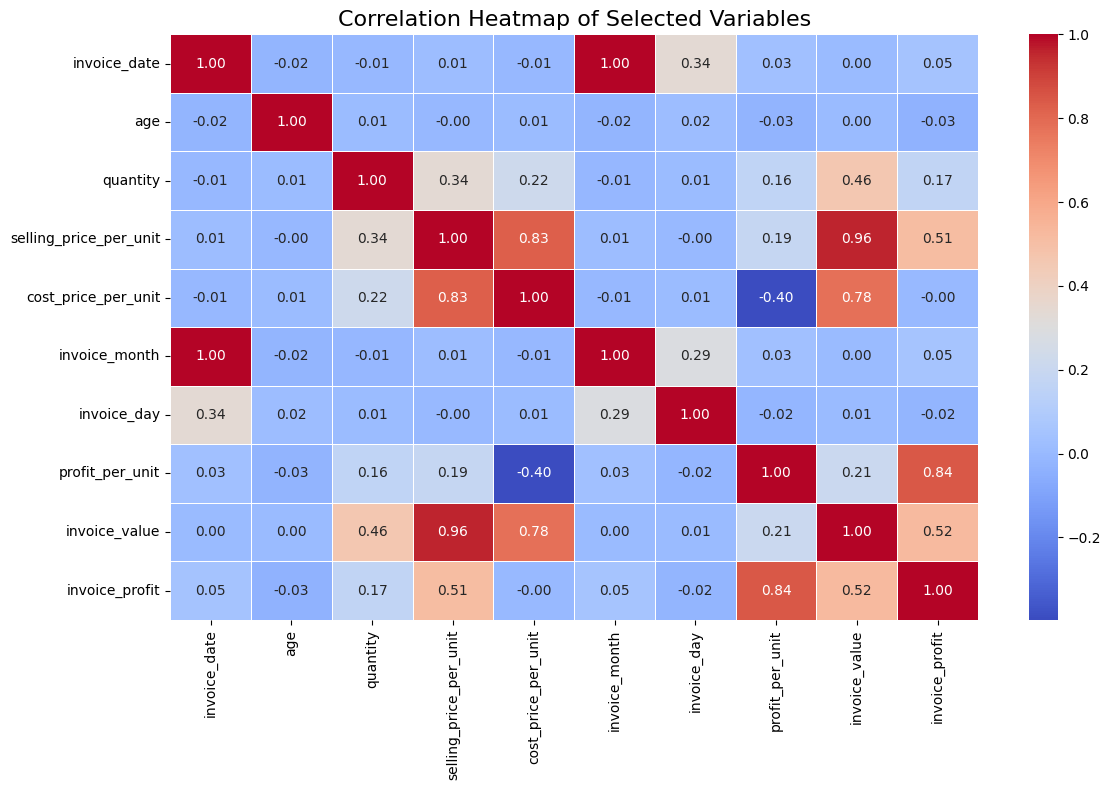

In [25]:
numeric_columns = ['invoice_date', 'age', 'quantity', 'selling_price_per_unit', 'cost_price_per_unit', 'invoice_month', 'invoice_day', 'profit_per_unit',
       'invoice_value', 'invoice_profit']

#sales[numeric_columns] = sales[numeric_columns].apply(pd.to_numeric, errors='coerce')

corr_matrix = sales[numeric_columns].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables', fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-26-8a917f08324a>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


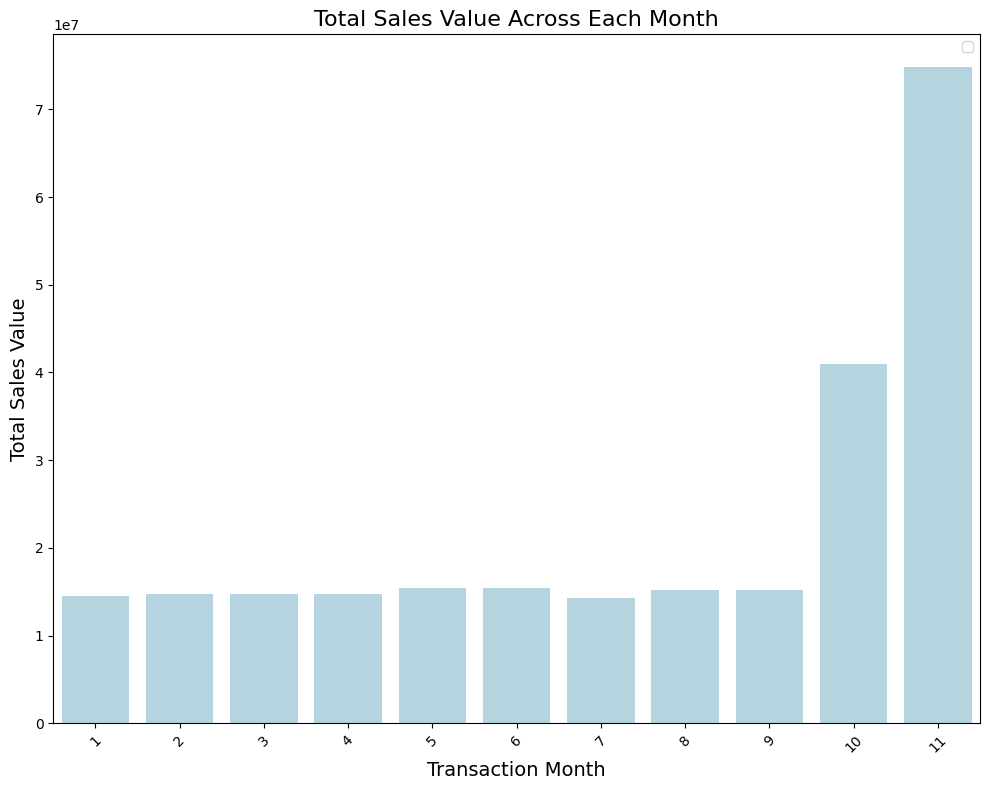

In [26]:
monthly_sales = sales.groupby('invoice_month')['invoice_value'].sum().reset_index()

plt.figure(figsize=(10, 8))


sns.barplot(x='invoice_month', y='invoice_value', data=monthly_sales, color='lightblue')


plt.title('Total Sales Value Across Each Month', fontsize=16)
plt.xlabel('Transaction Month', fontsize=14)
plt.ylabel('Total Sales Value', fontsize=14)

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

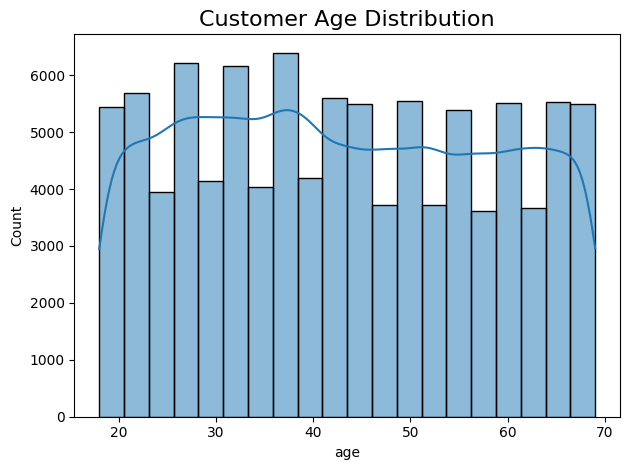

In [27]:
sns.histplot(sales['age'], bins = 20, kde = True)
plt.title('Customer Age Distribution', fontsize=16)
plt.tight_layout()
plt.show()

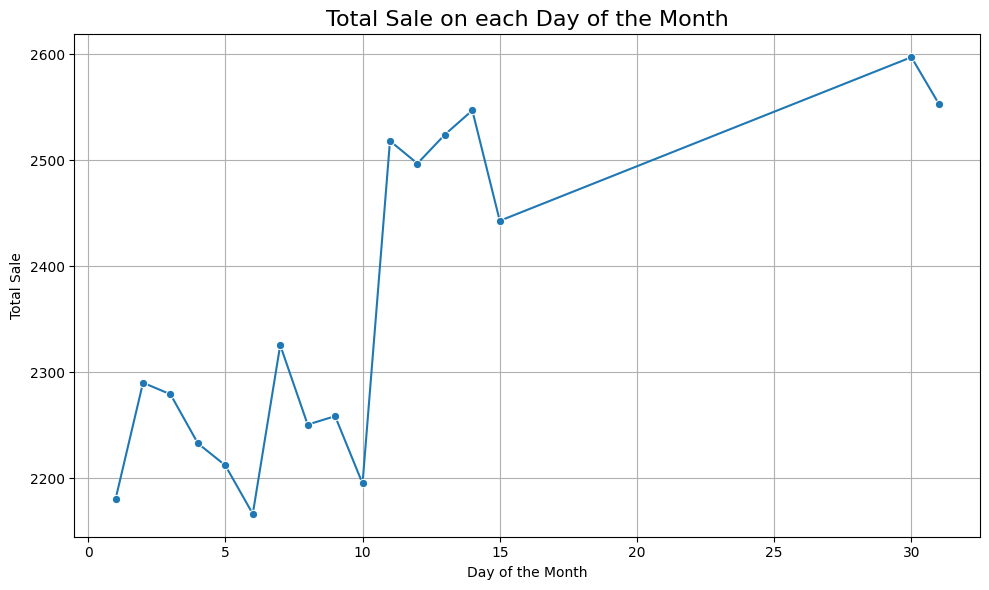

In [28]:
daily_sales = sales.groupby('invoice_day')['invoice_value'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='invoice_day', y='invoice_value', data=daily_sales, marker='o')
plt.xlabel('Day of the Month')
plt.ylabel('Total Sale')
plt.title('Total Sale on each Day of the Month', fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

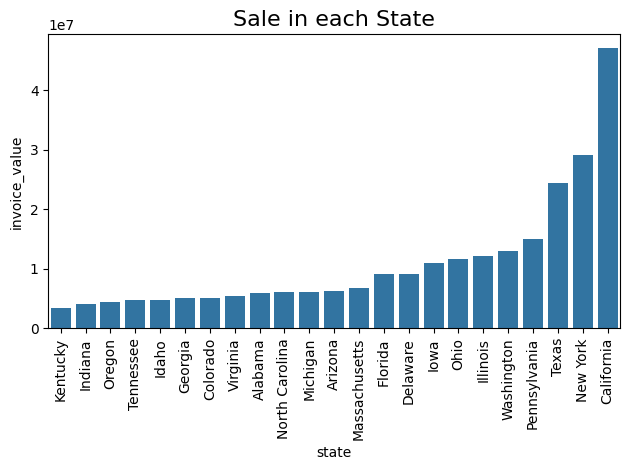

In [29]:
each_state_sales = sales.groupby(['state']).agg({'invoice_value':'sum'}) .reset_index()
each_state_sales = each_state_sales.sort_values('invoice_value')
sns.barplot(each_state_sales, y = 'invoice_value', x='state')
plt.title('Sale in each State', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

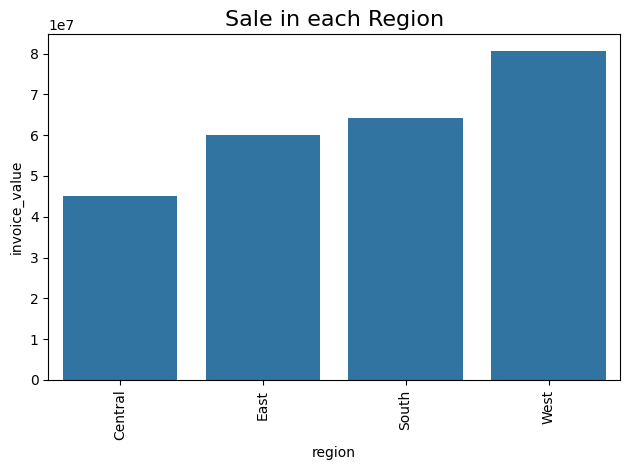

In [30]:
each_region_sales = sales.groupby(['region']).agg({'invoice_value':'sum'}) .reset_index()
each_region_sales = each_region_sales.sort_values('invoice_value')
sns.barplot(each_region_sales, y = 'invoice_value', x='region')
plt.title('Sale in each Region', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

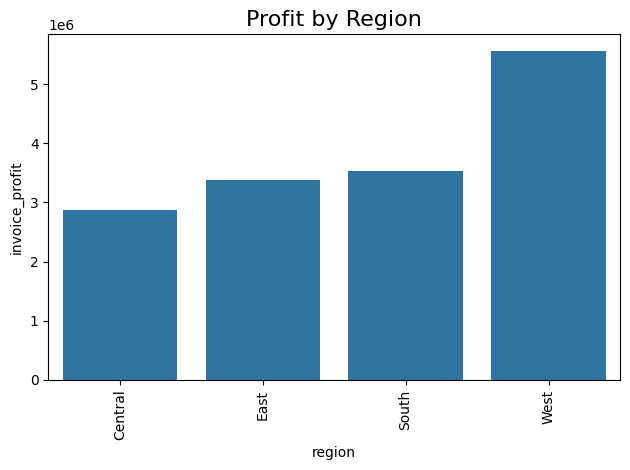

In [31]:
sns.barplot(sales.groupby(['region']).agg({'invoice_profit':'sum'}) .reset_index().sort_values('invoice_profit'), y = 'invoice_profit', x='region')
plt.title('Profit by Region', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

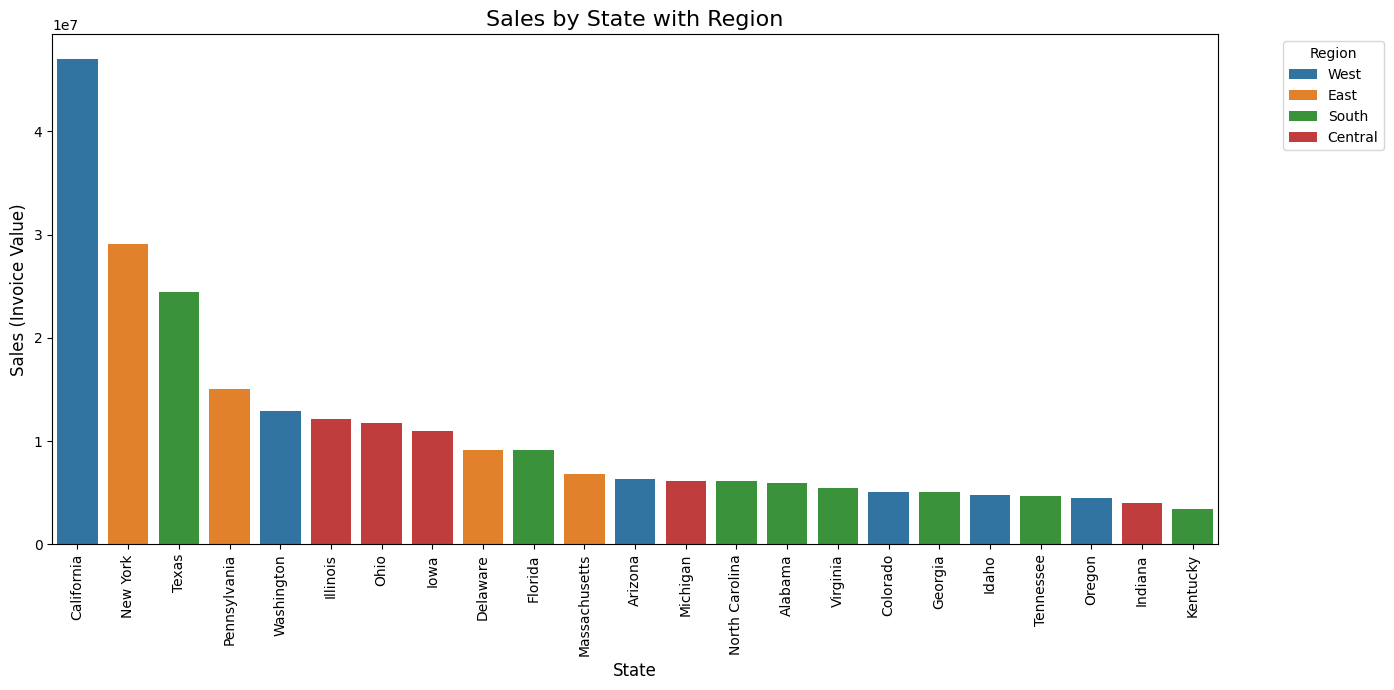

In [32]:
sales_by_region_state = sales.groupby(['region', 'state']).agg({'invoice_value': 'sum'}).reset_index()

# Sort the data by sales for better visualization
sales_by_region_state = sales_by_region_state.sort_values('invoice_value', ascending=False)

# Plot using seaborn barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_region_state, y='invoice_value', x='state', hue='region', dodge=False)

# Customize the plot
plt.title('Sales by State with Region', fontsize=16)
plt.ylabel('Sales (Invoice Value)', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


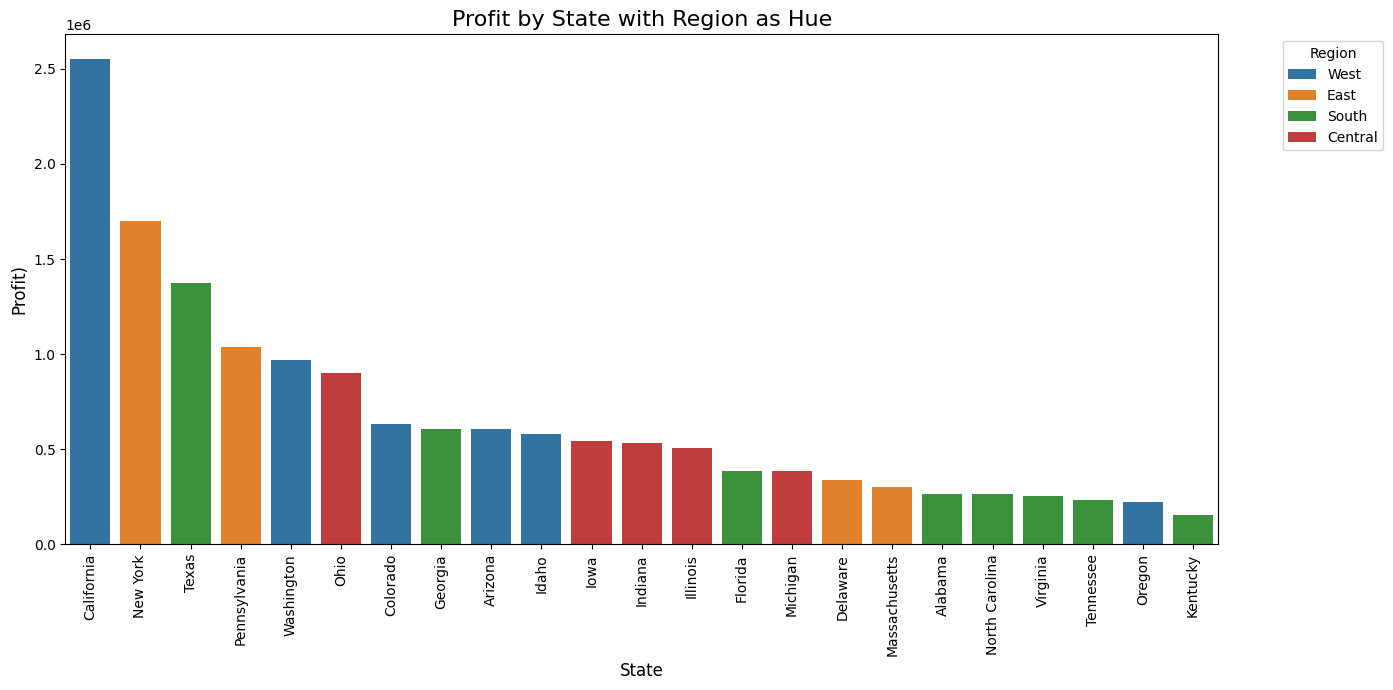

In [33]:
sales_by_region_state = sales.groupby(['region', 'state']).agg({'invoice_profit': 'sum'}).reset_index()

# Sort the data by sales for better visualization
sales_by_region_state = sales_by_region_state.sort_values('invoice_profit', ascending=False)

# Plot using seaborn barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_region_state, y='invoice_profit', x='state', hue='region', dodge=False)

# Customize the plot
plt.title('Profit by State with Region as Hue', fontsize=16)
plt.ylabel('Profit)', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


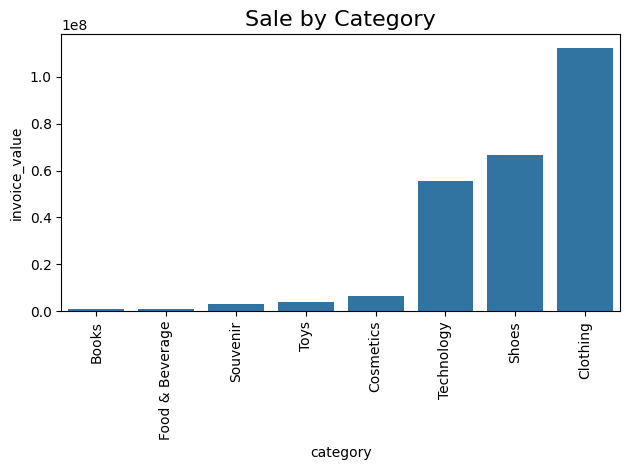

In [34]:
sns.barplot(sales.groupby(['category']).agg({'invoice_value':'sum'}) .reset_index().sort_values('invoice_value'), y = 'invoice_value', x='category')
plt.title('Sale by Category', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

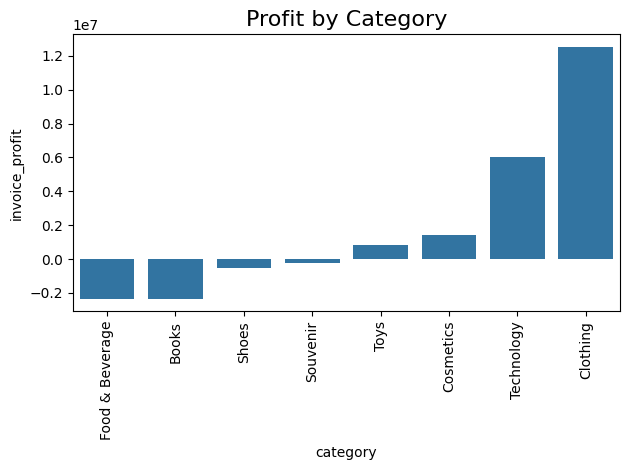

In [35]:
sns.barplot(sales.groupby(['category']).agg({'invoice_profit':'sum'}) .reset_index().sort_values('invoice_profit'), y = 'invoice_profit', x='category')
plt.title('Profit by Category', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

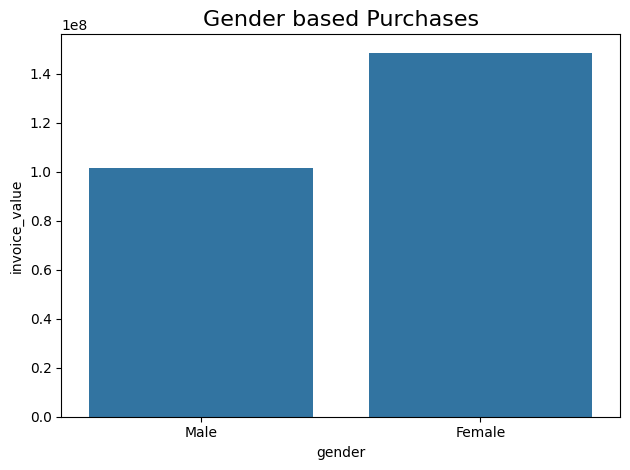

In [36]:
sns.barplot(sales.groupby(['gender']).agg({'invoice_value':'sum'}) .reset_index().sort_values('invoice_value'), y = 'invoice_value', x='gender')
plt.title('Gender based Purchases', fontsize=16)
plt.tight_layout()

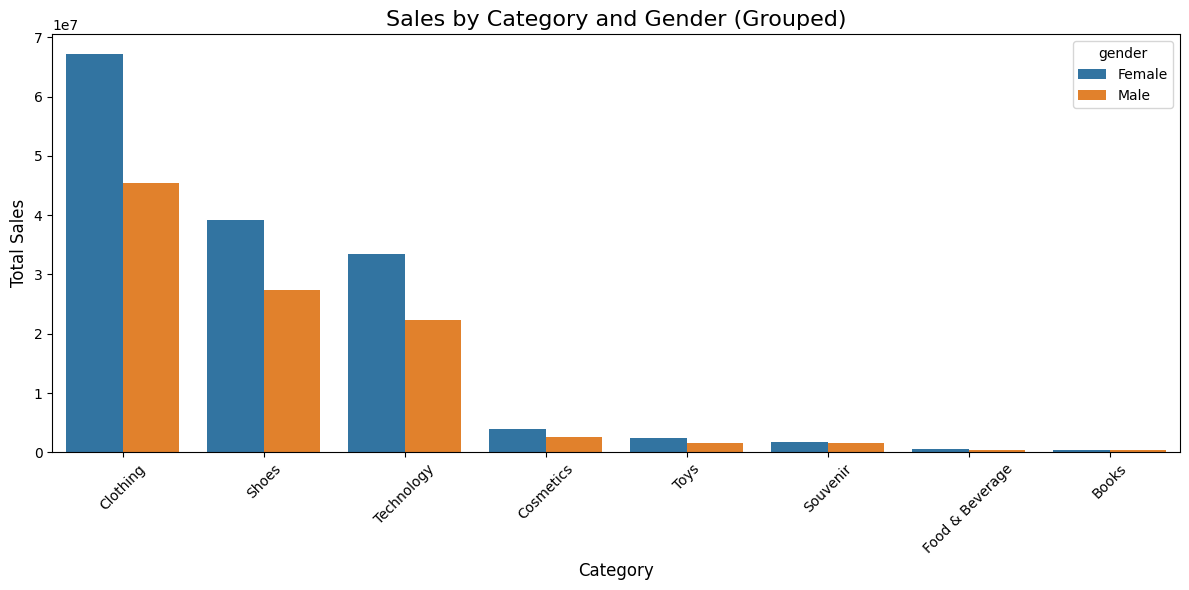

In [38]:
category_gender_sales = sales.groupby(['category', 'gender'])['invoice_value'].sum().reset_index()
category_gender_sales = category_gender_sales.sort_values('invoice_value', ascending=False)
# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=category_gender_sales, x='category', y='invoice_value', hue='gender')
plt.title('Sales by Category and Gender (Grouped)', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
sales.Is_Holiday.value_counts()

,count
Is_Holiday,
No,65134
Yes,34323


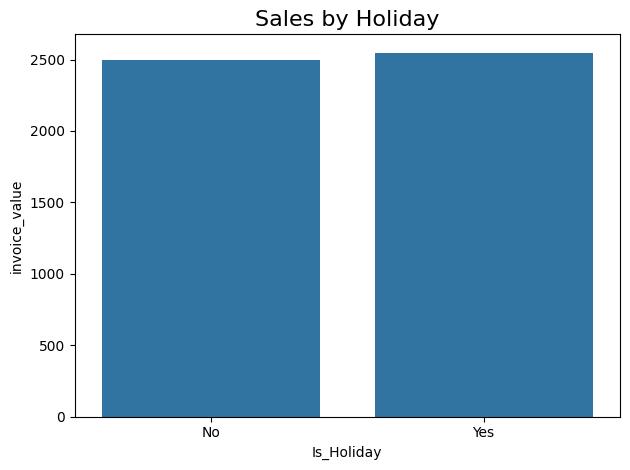

In [41]:
sns.barplot(sales.groupby(['Is_Holiday']).agg({'invoice_value':'mean'}) .reset_index().sort_values('invoice_value'), y = 'invoice_value', x='Is_Holiday')
plt.title('Sales by Holiday', fontsize=16)
plt.tight_layout()

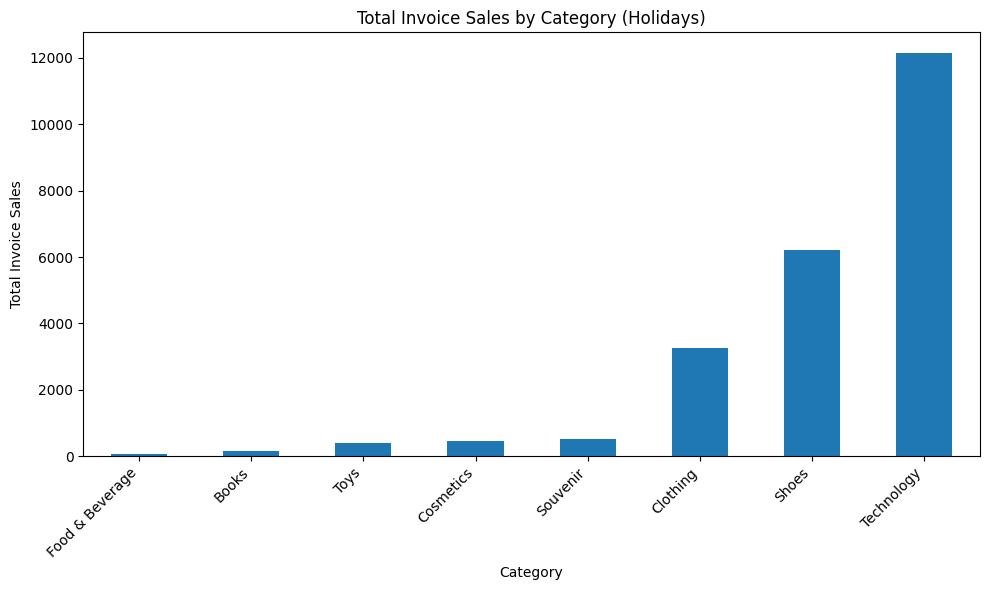

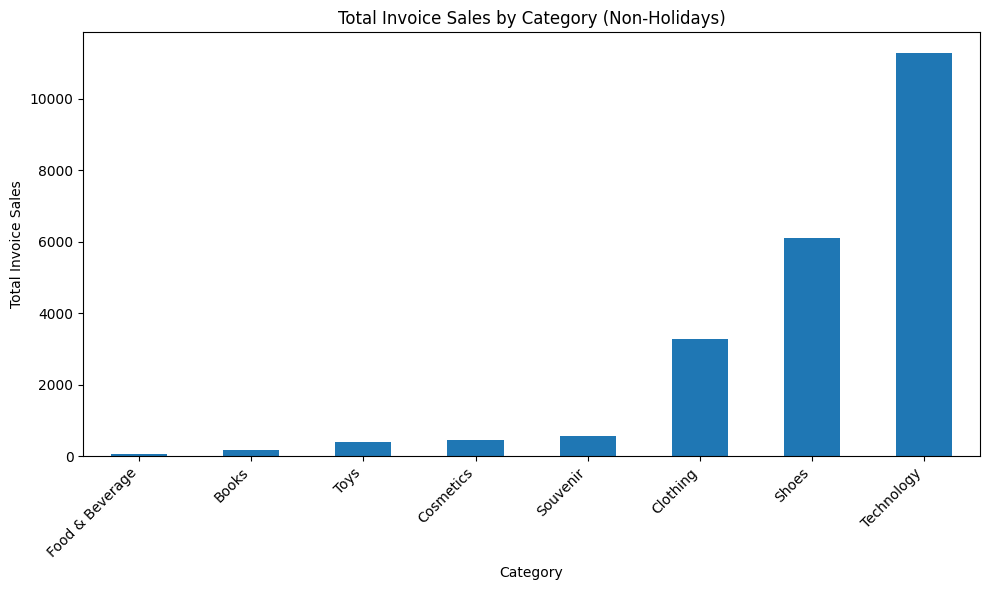

In [42]:
holiday_sales = sales[sales["Is_Holiday"] == "Yes"].groupby("category")["invoice_value"].mean().sort_values()
non_holiday_sales = sales[sales["Is_Holiday"] == "No"].groupby("category")["invoice_value"].mean().sort_values()

# Plot for holidays
plt.figure(figsize=(10, 6))
holiday_sales.plot(kind="bar", title="Total Invoice Sales by Category (Holidays)", ylabel="Total Invoice Sales", xlabel="Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot for non-holidays
plt.figure(figsize=(10, 6))
non_holiday_sales.plot(kind="bar", title="Total Invoice Sales by Category (Non-Holidays)", ylabel="Total Invoice Sales", xlabel="Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

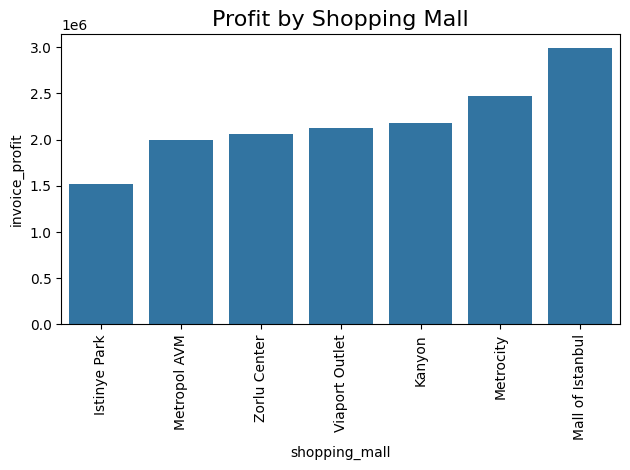

In [43]:
sns.barplot(sales.groupby(['shopping_mall']).agg({'invoice_profit':'sum'}) .reset_index().sort_values('invoice_profit'), y = 'invoice_profit', x='shopping_mall')
plt.title('Profit by Shopping Mall', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

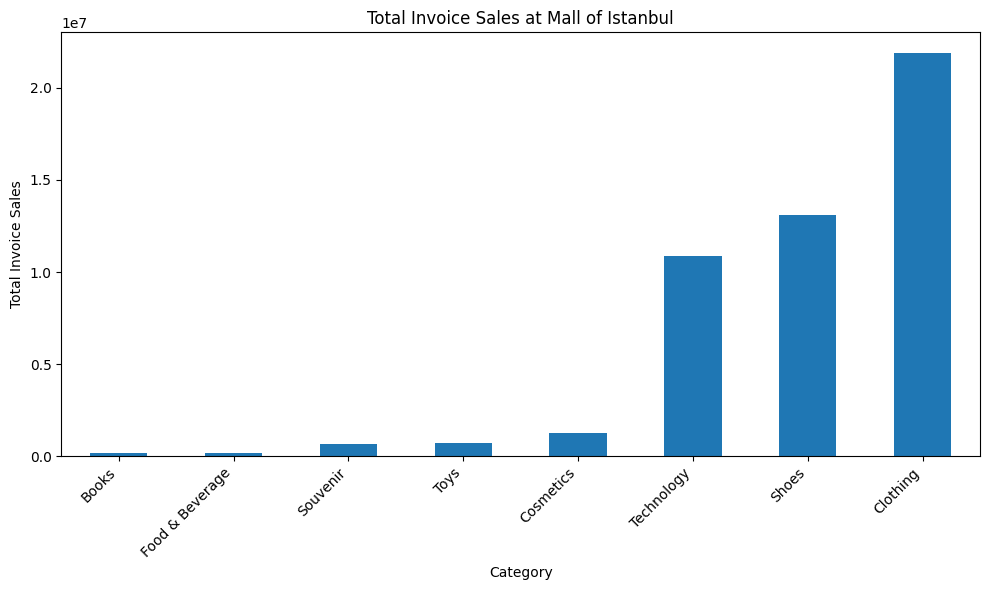

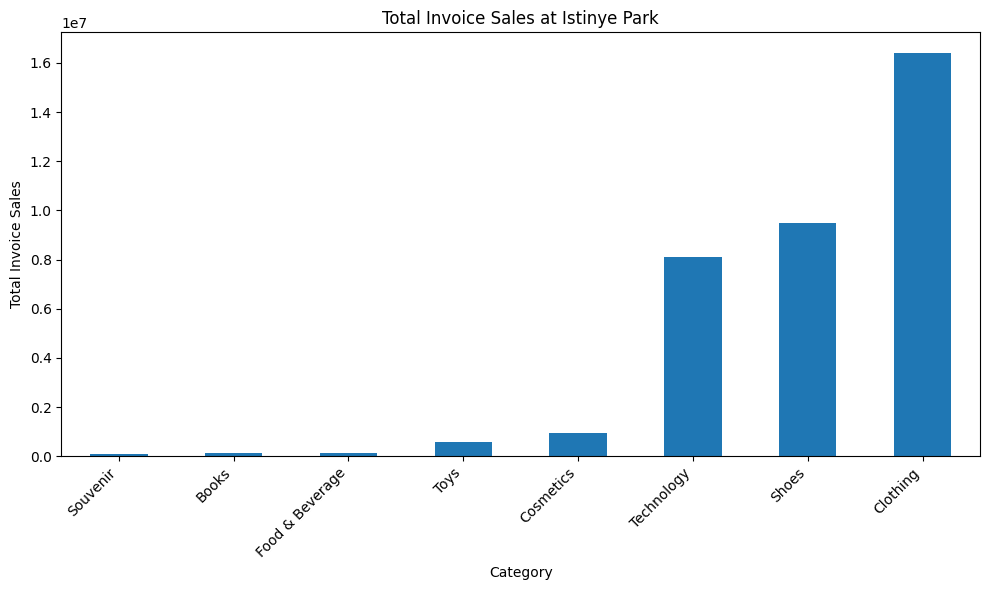

In [44]:
highest_profit_mall = sales[sales["shopping_mall"] == "Mall of Istanbul"].groupby("category")["invoice_value"].sum().sort_values()
least_profit_mall = sales[sales["shopping_mall"] == "Istinye Park"].groupby("category")["invoice_value"].sum().sort_values()

plt.figure(figsize=(10, 6))
highest_profit_mall.plot(kind="bar", title="Total Invoice Sales at Mall of Istanbul", ylabel="Total Invoice Sales", xlabel="Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
least_profit_mall.plot(kind="bar", title="Total Invoice Sales at Istinye Park", ylabel="Total Invoice Sales", xlabel="Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


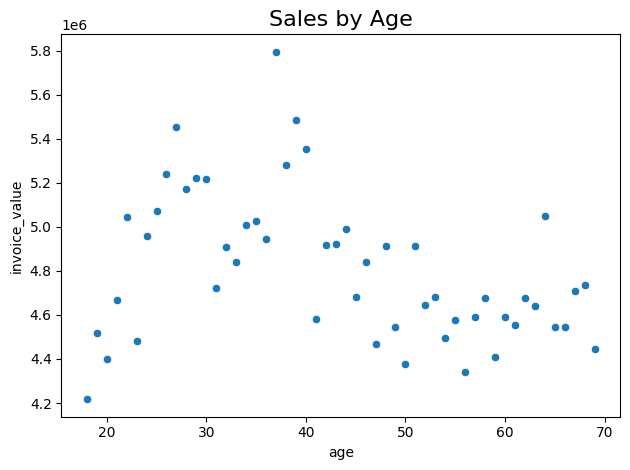

In [45]:
sales_by_age = sales.groupby(['age']).agg({'invoice_value':'sum'}) .reset_index().sort_values('invoice_value')
sns.scatterplot(sales_by_age, y = 'invoice_value', x='age')
plt.title('Sales by Age', fontsize=16)
plt.tight_layout()

In [46]:
sales_by_age.sort_values('invoice_value', ascending=False)

,age,invoice_value
19,37,5794893.54
21,39,5482803.34
9,27,5451547.71
22,40,5351479.81
20,38,5281623.72
8,26,5237752.26
11,29,5219396.07
12,30,5217131.68
10,28,5169418.79
7,25,5070817.41


In [47]:
s = sales_by_age[sales_by_age['invoice_value'] >= sales_by_age['invoice_value'].mean()]
s

,age,invoice_value
28,46,4840772.98
15,33,4841898.59
14,32,4909448.63
33,51,4911853.49
30,48,4913547.09
24,42,4918426.49
25,43,4920960.58
18,36,4946930.11
6,24,4957727.79
26,44,4990447.55


In [48]:
sales_age_grtr_than_50 = sales[sales['age'] > 50]
sales_age_grtr_than_50

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Is_Holiday,Reason,invoice_month,invoice_day,profit_per_unit,invoice_value,invoice_profit
0,I824010,2016-11-15,C101310,Male,63,Food & Beverage,2,10.46,7.322,Debit Card,South,Alabama,Metrocity,No,None,11,15,3.138,20.92,6.276
2,I702964,2016-11-15,C105114,Male,56,Technology,4,4200.00,3780.000,Cash,South,Georgia,Istinye Park,No,None,11,15,420.000,16800.00,1680.000
8,I332105,2016-11-15,C102019,Female,65,Shoes,4,2400.68,2280.646,Credit Card,East,Pennsylvania,Metropol AVM,No,None,11,15,120.034,9602.72,480.136
11,I134399,2016-11-15,C1048,Male,65,Clothing,1,300.08,225.060,Cash,West,California,Kanyon,No,None,11,15,75.020,300.08,75.020
16,I887161,2016-11-15,C102790,Female,58,Clothing,1,300.08,225.060,Cash,East,Delaware,Kanyon,No,None,11,15,75.020,300.08,75.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99442,I321308,2016-01-11,C1011799,Male,51,Clothing,3,900.24,675.180,Cash,West,Washington,Kanyon,No,None,1,11,225.060,2700.72,675.180
99445,I889499,2016-01-11,C1013563,Female,58,Food & Beverage,5,26.15,196.125,Credit Card,East,Pennsylvania,Viaport Outlet,No,None,1,11,-169.975,130.75,-849.875
99448,I119747,2016-01-11,C104881,Male,59,Cosmetics,1,40.66,28.462,Cash,West,Washington,Metropol AVM,No,None,1,11,12.198,40.66,12.198
99453,I319113,2016-01-11,C1012272,Female,65,Technology,4,4200.00,3780.000,Debit Card,South,Alabama,Kanyon,No,None,1,11,420.000,16800.00,1680.000


In [49]:
sales_age_btwn_20_and_50 = sales[(sales['age']>=20) & (sales['age'] <= 50)]
sales_age_btwn_20_and_50

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Is_Holiday,Reason,invoice_month,invoice_day,profit_per_unit,invoice_value,invoice_profit
1,I232867,2016-11-15,C103240,Female,36,Souvenir,3,35.19,24.633,Credit Card,South,Georgia,Mall of Istanbul,No,None,11,15,10.557,105.57,31.671
3,I170504,2016-11-15,C102490,Female,28,Books,1,15.15,10.605,Cash,West,Arizona,Zorlu Center,No,None,11,15,4.545,15.15,4.545
4,I219422,2016-11-15,C1011229,Female,45,Souvenir,5,58.65,439.875,Credit Card,South,Alabama,Kanyon,No,None,11,15,-381.225,293.25,-1906.125
5,I675411,2016-11-15,C102917,Male,50,Toys,5,179.20,143.360,Cash,South,Alabama,Metropol AVM,No,None,11,15,35.840,896.00,179.200
6,I325143,2016-11-15,C107624,Male,27,Food & Beverage,2,10.46,7.322,Cash,South,Alabama,Viaport Outlet,No,None,11,15,3.138,20.92,6.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99449,I292170,2016-01-11,C107287,Female,44,Clothing,2,600.16,450.120,Cash,Central,Iowa,Metropol AVM,No,None,1,11,150.040,1200.32,300.080
99450,I264530,2016-01-11,C1012884,Male,38,Food & Beverage,4,20.92,15.690,Credit Card,South,Alabama,Istinye Park,No,None,1,11,5.230,83.68,20.920
99451,I184404,2016-01-11,C106368,Male,40,Food & Beverage,2,10.46,7.322,Cash,East,Delaware,Metropol AVM,No,None,1,11,3.138,20.92,6.276
99454,I337200,2016-01-11,C107038,Female,44,Cosmetics,3,121.98,91.485,Cash,West,Idaho,Viaport Outlet,No,None,1,11,30.495,365.94,91.485


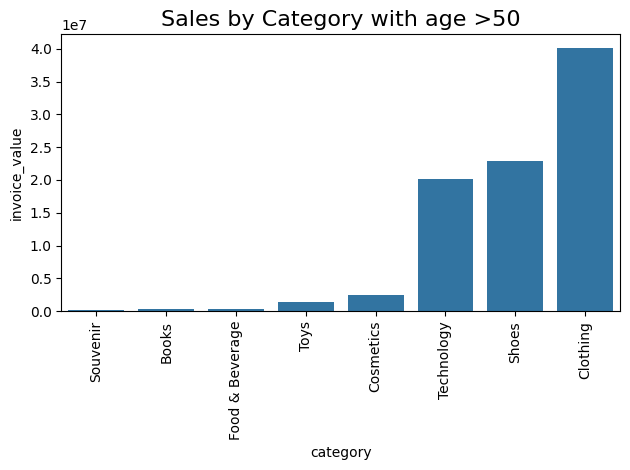

In [53]:
sns.barplot(sales_age_grtr_than_50.groupby(['category']).agg({'invoice_value':'sum'}) .reset_index().sort_values('invoice_value'), y = 'invoice_value', x='category')
plt.title('Sales by Category with age >50', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()



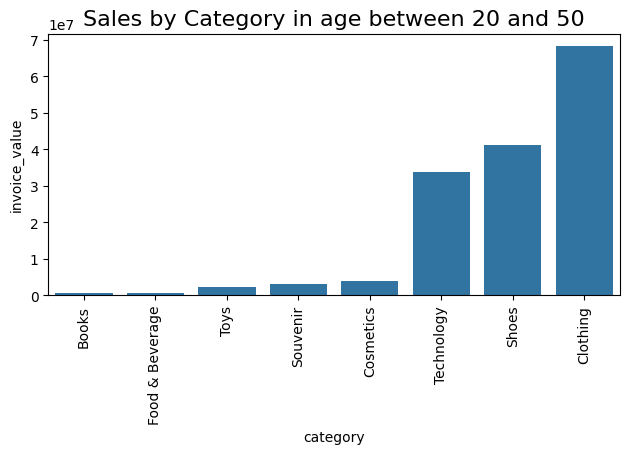

In [54]:
sns.barplot(sales_age_btwn_20_and_50.groupby(['category']).agg({'invoice_value':'sum'}) .reset_index().sort_values('invoice_value'), y = 'invoice_value', x='category')
plt.title('Sales by Category in age between 20 and 50', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()

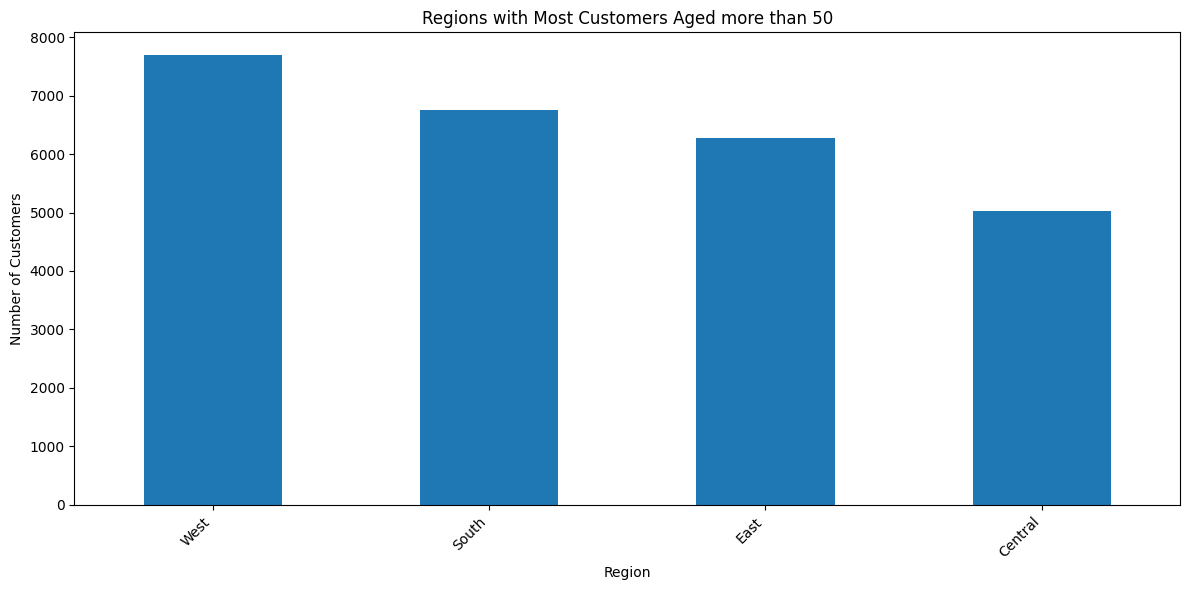

In [56]:
region_age_distribution_age_grt_50 = sales_age_grtr_than_50.groupby("region")["customer_id"].nunique().sort_values(ascending=False)

# Plotting the regions where the age group is most populated
plt.figure(figsize=(12, 6))
region_age_distribution_age_grt_50.plot(kind="bar", title="Regions with Most Customers Aged more than 50", ylabel="Number of Customers", xlabel="Region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

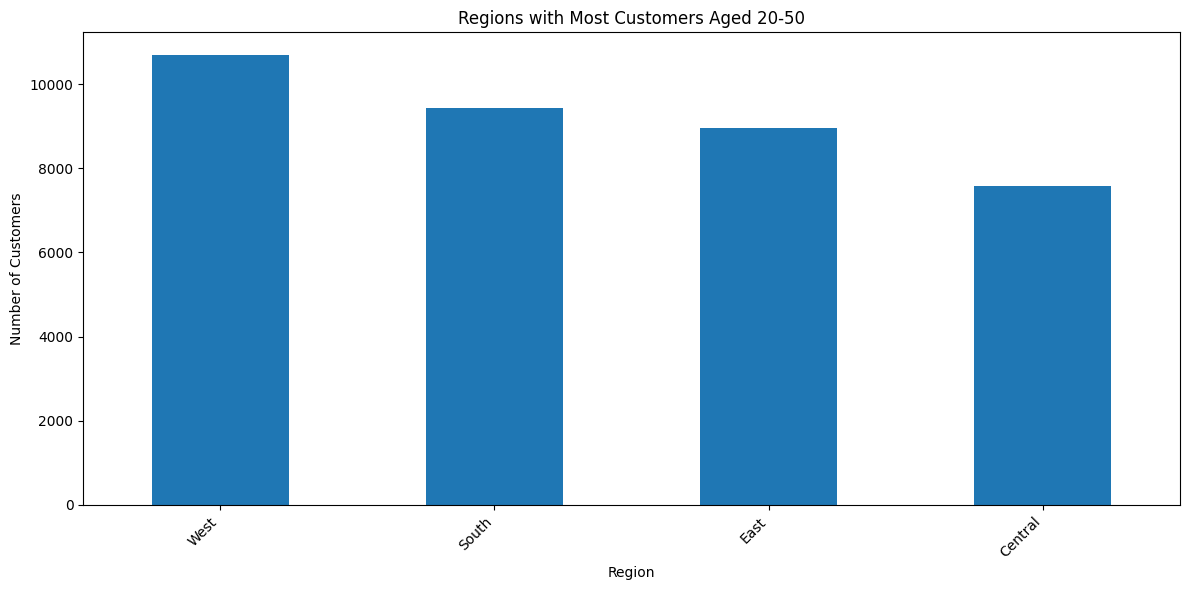

In [57]:
region_age_distribution = sales_age_btwn_20_and_50.groupby("region")["customer_id"].nunique().sort_values(ascending=False)

# Plotting the regions where the age group is most populated
plt.figure(figsize=(12, 6))
region_age_distribution.plot(kind="bar", title="Regions with Most Customers Aged 20-50", ylabel="Number of Customers", xlabel="Region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

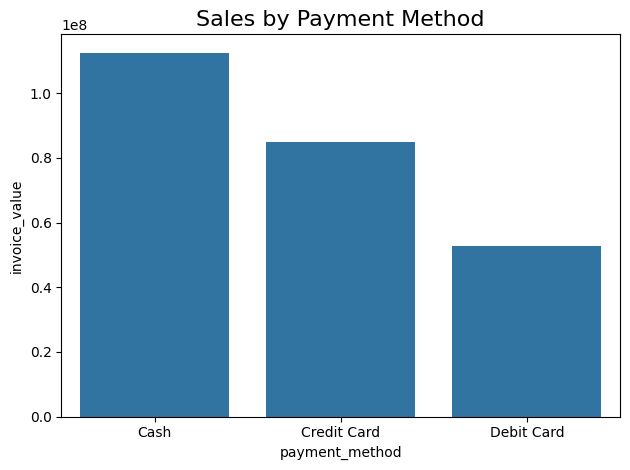

In [60]:
sns.barplot(sales.groupby('payment_method')['invoice_value'].sum().sort_values(ascending=False).reset_index(), y = 'invoice_value', x='payment_method')
plt.title('Sales by Payment Method', fontsize=16)
plt.tight_layout()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [62]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   invoice_no              99457 non-null  object        
 1   invoice_date            99457 non-null  datetime64[ns]
 2   customer_id             99457 non-null  object        
 3   gender                  99457 non-null  object        
 4   age                     99457 non-null  int64         
 5   category                99457 non-null  object        
 6   quantity                99457 non-null  int64         
 7   selling_price_per_unit  99457 non-null  float64       
 8   cost_price_per_unit     99457 non-null  float64       
 9   payment_method          99457 non-null  object        
 10  region                  99457 non-null  object        
 11  state                   99457 non-null  object        
 12  shopping_mall           99457 non-null  object

In [63]:
sales_reg = sales.drop(['invoice_date','invoice_no','customer_id',
                        'Reason'], axis=1)

In [64]:
categorical_cols = sales_reg.select_dtypes(include=["object"]).columns
numerical_cols = sales_reg.select_dtypes(include=["int64", "float64"]).columns
categorical_cols

Index(['gender', 'category', 'payment_method', 'region', 'state',
       'shopping_mall', 'Is_Holiday'],
      dtype='object')

In [65]:
encoded_sales_reg = pd.get_dummies(sales_reg, columns=['gender', 'category', 'payment_method', 'region', 'state',
         'shopping_mall', 'Is_Holiday'])

In [66]:
encoded_sales_reg

,age,quantity,selling_price_per_unit,cost_price_per_unit,invoice_month,invoice_day,profit_per_unit,invoice_value,invoice_profit,gender_Female,...,state_Washington,shopping_mall_Istinye Park,shopping_mall_Kanyon,shopping_mall_Mall of Istanbul,shopping_mall_Metrocity,shopping_mall_Metropol AVM,shopping_mall_Viaport Outlet,shopping_mall_Zorlu Center,Is_Holiday_No,Is_Holiday_Yes
0,63,2,10.46,7.322,11,15,3.138,20.92,6.276,False,...,False,False,False,False,True,False,False,False,True,False
1,36,3,35.19,24.633,11,15,10.557,105.57,31.671,True,...,False,False,False,True,False,False,False,False,True,False
2,56,4,4200.00,3780.000,11,15,420.000,16800.00,1680.000,False,...,False,True,False,False,False,False,False,False,True,False
3,28,1,15.15,10.605,11,15,4.545,15.15,4.545,True,...,False,False,False,False,False,False,False,True,True,False
4,45,5,58.65,439.875,11,15,-381.225,293.25,-1906.125,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,19,1,1050.00,945.000,1,11,105.000,1050.00,105.000,False,...,False,False,False,False,True,False,False,False,True,False
99453,65,4,4200.00,3780.000,1,11,420.000,16800.00,1680.000,True,...,False,False,True,False,False,False,False,False,True,False
99454,44,3,121.98,91.485,1,11,30.495,365.94,91.485,True,...,False,False,False,False,False,False,True,False,True,False
99455,50,3,3150.00,2677.500,1,11,472.500,9450.00,1417.500,True,...,False,False,False,False,True,False,False,False,True,False


In [67]:
X = encoded_sales_reg.drop(["invoice_value"], axis=1)
y = encoded_sales_reg["invoice_value"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [70]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 Score:", r2, "MAE:", mae, "RMSE:", rmse)

R2 Score: 0.9748012934473638 MAE: 444.0645606371005 RMSE: 653.1554286167174


In [71]:
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 Score:", r2, "MAE:", mae, "RMSE:", rmse)

R2 Score: 0.9999495877615784 MAE: 0.4294653378335748 RMSE: 29.21429477566825


In [72]:
feature_importances = rfr.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
2,selling_price_per_unit,7.174600e-01
7,invoice_profit,1.675631e-01
3,cost_price_per_unit,7.207789e-02
1,quantity,2.295875e-02
6,profit_per_unit,1.858715e-02
11,category_Clothing,8.668808e-04
14,category_Shoes,2.438043e-04
16,category_Technology,2.153919e-04
12,category_Cosmetics,1.007450e-05
17,category_Toys,7.611674e-06


In [73]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [74]:
clustering_data = sales[["age", "gender", "invoice_value", "invoice_profit"]]

In [75]:
clustering_data["gender"] = LabelEncoder().fit_transform(clustering_data["gender"])
clustering_data

<ipython-input-75-137cd10f4abd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data["gender"] = LabelEncoder().fit_transform(clustering_data["gender"])


,age,gender,invoice_value,invoice_profit
0,63,1,20.92,6.276
1,36,0,105.57,31.671
2,56,1,16800.00,1680.000
3,28,0,15.15,4.545
4,45,0,293.25,-1906.125
...,...,...,...,...
99452,19,1,1050.00,105.000
99453,65,0,16800.00,1680.000
99454,44,0,365.94,91.485
99455,50,0,9450.00,1417.500


In [76]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [77]:
# Determine the optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

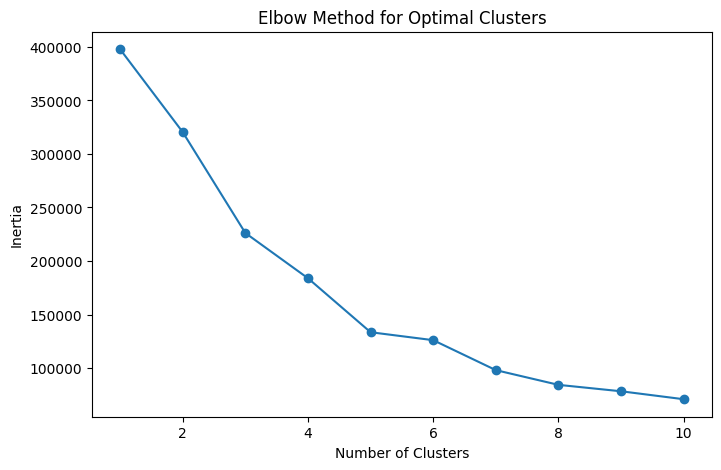

In [78]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [80]:
# Fit KMeans with optimal clusters (e.g., k=3)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
sales["Cluster"] = kmeans.fit_predict(scaled_data)

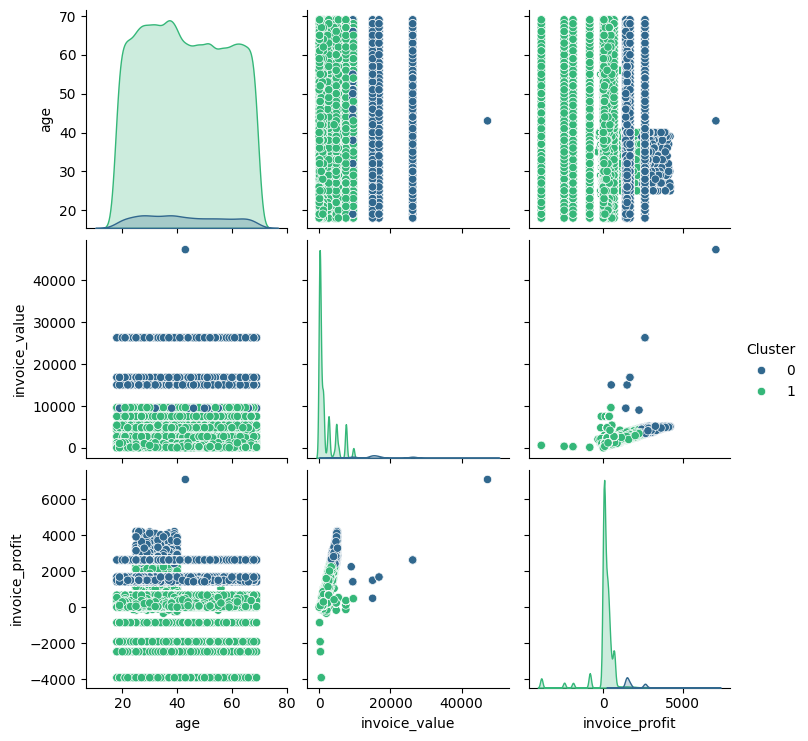

In [81]:
sns.pairplot(sales, vars=["age", "invoice_value", "invoice_profit"], hue="Cluster", palette="viridis")
plt.show()

In [83]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
sales_forecast = sales

In [85]:
sales_forecast = sales_forecast.set_index("invoice_date")

In [86]:
time_series = sales_forecast["invoice_value"].resample("D").sum()

In [87]:
result = adfuller(time_series.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Time series is non-stationary. Differencing is needed.")
    time_series_diff = time_series.diff().dropna()
else:
    print("Time series is stationary.")
    time_series_diff = time_series

ADF Statistic: -9.455976886035087
p-value: 4.48415286413412e-16
Time series is stationary.


In [88]:
#train_size = int(len(time_series_diff) * 0.8)
#train_data, test_data = time_series_diff[:train_size], time_series_diff[train_size:]

In [89]:
model1 = ARIMA(time_series_diff, order=(1,1,1))
model2 = SARIMAX(time_series_diff, order=(1,1,1), seasonal_order=(1,1,1,12))
model1_fit = model1.fit()
model2_fit = model2.fit()

In [90]:
forecast1 = model1_fit.forecast(steps=30)
forecast2 = model2_fit.forecast(steps=30)

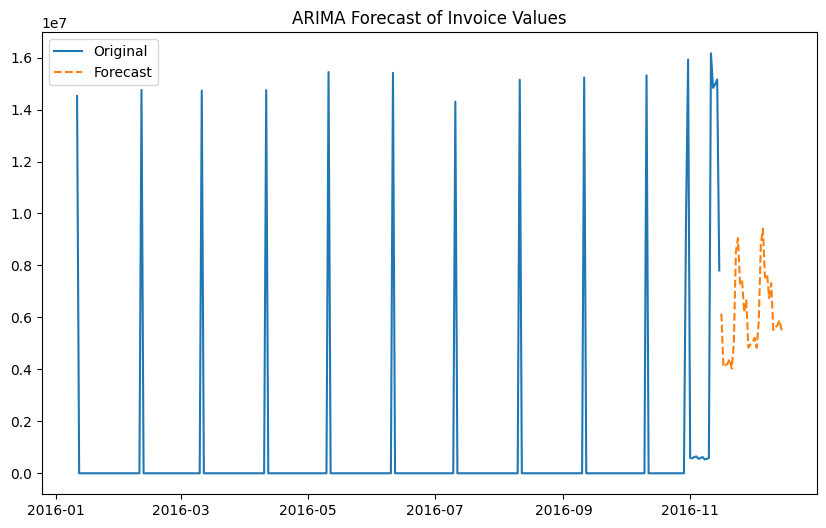

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Original")
plt.plot(forecast1.index, forecast2, label="Forecast", linestyle="--")
plt.title("ARIMA Forecast of Invoice Values")
plt.legend()
plt.show()

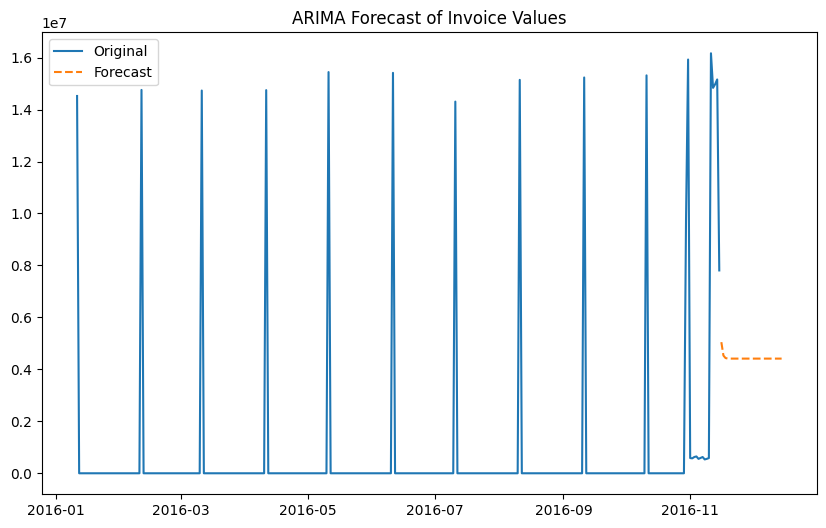

In [92]:
# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Original")
plt.plot(forecast2.index, forecast1, label="Forecast", linestyle="--")
plt.title("ARIMA Forecast of Invoice Values")
plt.legend()
plt.show()